# "Ïã†Ïö©Ïπ¥Îìú ÏÇ¨Ïö©Ïûê Ïó∞Ï≤¥ ÏòàÏ∏° AI Í≤ΩÏßÑÎåÄÌöå"Ïùò train Îç∞Ïù¥ÌÑ∞Î°ú Íµ∞ÏßëÌôî Ïã§Ïäµ Î∞è ÎßàÏºÄÌåÖ Ï†ÑÎûµ ÎèÑÏ∂ú

## <span style="color:orange">Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨ ALL</span> 

In [1]:
# [0] ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import random, warnings
warnings.filterwarnings("ignore")

# Í∏∞Î≥∏ ÏãúÍ∞ÅÌôî ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns 
from matplotlib import rc
rc("font", family="AppleGothic")
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "iframe"
plt.rcParams['axes.unicode_minus'] = False

# Ïä§ÏºÄÏùºÎßÅ.. Îì±
from sklearn.preprocessing import StandardScaler
from category_encoders.ordinal import OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞
train_df = pd.read_csv('/Users/raekkkky/Desktop/DNA/winter 24/project7/train.csv')
train_df.shape

(26457, 20)

In [ ]:
# creditÏùÑ 0,1 -> 1Î°ú 2->2Î°ú Ìï¥ÏÑú Ï¢ãÎã§ ÏïàÏ¢ãÎã§Î°úÎßå Ìï¥ÏÑùÌïòÍ∏∞!
# train_df['credit'] = train_df['credit'].replace({0: 1, 1: 1})

# occyp_type Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞ (ÏÇ¥Î¶¨Í∏∞)
# train_df.dropna(subset=['occyp_type'], inplace=True)

In [2]:
# [1] ID Î≥ÄÏàò ÏÉùÏÑ±Ìï¥ÏÑú ÎèôÏùº Ïù∏Î¨º Ï∂îÎ¶¨Í∏∞
train_df['ID'] = \
train_df['child_num'].astype(str) + '_' + train_df['income_total'].astype(str) + '_' +\
train_df['DAYS_BIRTH'].astype(str) + '_' + train_df['DAYS_EMPLOYED'].astype(str) + '_' +\
train_df['work_phone'].astype(str) + '_' + train_df['phone'].astype(str) + '_' +\
train_df['email'].astype(str) + '_' + train_df['family_size'].astype(str) + '_' +\
train_df['gender'].astype(str) + '_' + train_df['car'].astype(str) + '_' +\
train_df['reality'].astype(str) + '_' + train_df['income_type'].astype(str) + '_' +\
train_df['edu_type'].astype(str) + '_' + train_df['family_type'].astype(str) + '_' +\
train_df['house_type'].astype(str) + '_' + train_df['occyp_type'].astype(str)

# [2] Ïù∏Îãπ Ïπ¥Îìú Î∞úÍ∏â Í∞úÏàò Î≥ÄÏàò Ï∂îÍ∞ÄÌïòÍ∏∞
train_df['credit_card_count'] = train_df.groupby('ID')['ID'].transform('count')

# [3] ID Ï§ëÎ≥µ Ï≤òÎ¶¨ (ÎèôÏùº Ïù∏Î¨ºÏù¥ÎùºÍ≥† ÌåêÎã®)
train_df = train_df.drop_duplicates(subset='ID', keep='first')

# [4] Î∂àÌïÑÏöîÌïú ID Î≥ÄÏàò ÏÇ≠Ï†ú
train_df = train_df.drop('ID', axis=1)
train_df.shape

(8759, 21)

In [3]:
# [5] ÏùòÎØ∏ÏóÜÎäî Î≥ÄÏàò 6Í∞ú Ï†úÍ±∞
train_df.drop(['index', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'occyp_type'], axis=1, inplace=True)
train_df.shape
# 1. index -> Î∂àÌïÑÏöîÌïòÎØÄÎ°ú ÏÇ≠Ï†ú
# 2. gender
# 3. car
# 4. reality
# 5. child_num
# 6. income_total
# 7. income_type
# 8. edu_type
# 9. family_type
# 10. house_type
# 11. DAYS_BIRTH
# 12. DAYS_EMPLOYED
# 13. FLAG_MOBIL -> Î∂àÌïÑÏöîÌïòÎØÄÎ°ú ÏÇ≠Ï†ú
# 14. work_phone -> Î∂àÌïÑÏöîÌïòÎØÄÎ°ú ÏÇ≠Ï†ú
# 15. phone -> Î∂àÌïÑÏöîÌïòÎØÄÎ°ú ÏÇ≠Ï†ú
# 16. email -> Î∂àÌïÑÏöîÌïòÎØÄÎ°ú ÏÇ≠Ï†ú
# 17. occyp_type -> Í≤∞Ï∏°ÏπòÍ∞Ä ÎÑàÎ¨¥ ÎßéÏúºÎØÄÎ°ú ÏÇ≠Ï†ú
# 18. family_size
# 19. begin_month
# 20. credit
# 21. credit_card_count

(8759, 15)

In [4]:
# [6] Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨(Ï†úÍ±∞)
train_df = train_df[(train_df['family_size'] <= 7)]  # Í∞ÄÏ°± ÏàòÍ∞Ä 7 Ï¥àÍ≥ºÏù∏ Í≤ÉÎì§ ÏÇ≠Ï†ú
train_df = train_df[(train_df['child_num'] <= 5)]  # ÏûêÎÖÄ ÏàòÍ∞Ä 5 Ï¥àÍ≥ºÏù∏ Í≤ÉÎì§ ÏÇ≠Ï†ú
train_df = train_df.reset_index(drop=True)  # ÏÉàÎ°≠Í≤å Ï¥àÍ∏∞Ìôî Î∞∞Ïó¥

# [7] ÎÇ†ÏßúÎ≥ÄÏàò Î≥ÄÌôò (ÏñëÏàò->0 + ÏùåÏàò->ÏñëÏàò)
train_df['DAYS_EMPLOYED'] = train_df['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
dates = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for date in dates:
    train_df[date] = np.abs(train_df[date])

In [5]:
# [8] Ï†ÑÎûµ ÎèÑÏ∂úÏóê ÌïÑÏöîÌïú ÌååÏÉùÎ≥ÄÏàò 5Í∞ú ÏÉùÏÑ± [Ï∞∏Í≥†Î°ú Î≥ÄÏàòÏÑ†ÌÉùÏùÄ ÏïàÌï†Í±∞ÏûÑ (Îã§ ÌïÑÏöîÌï®)]

# 1. before_EMPLOYED_year : Í≥†Ïö©ÎêòÏßÄ Ï†ÑÍπåÏßÄÏùò ÎÖÑ
train_df['before_EMPLOYED_year'] = (train_df['DAYS_BIRTH'] - train_df['DAYS_EMPLOYED']) // 365

# 2. Age : ÎÇòÏù¥
train_df['Age'] = train_df['DAYS_BIRTH'] // 365
    
# 3. DAYS_BIRTH_month : ÌÉúÏñ¥ÎÇú Ïõî (Ï∂úÏÉùÏó∞ÎèÑÏùò nÏõî)
train_df['DAYS_BIRTH_month'] = np.floor(train_df['DAYS_BIRTH'] / 30) - ((np.floor(train_df['DAYS_BIRTH'] / 30) / 12).astype(int) * 12)

# 4. EMPLOYED : Í∑ºÏÜçÏó∞Ïàò
train_df['EMPLOYED'] = train_df['DAYS_EMPLOYED'] // 365

# 5. begin_year : Ïã†Ïö©Ïπ¥Îìú Î∞úÍ∏â ÎÖÑÎèÑ
train_df['begin_year'] = train_df['begin_month'] // 12

train_df.shape

(8756, 20)

In [6]:
# [9] Numeric, Category Ïª¨Îüº Î∂ÑÎ•ò

numerical_feats = train_df.dtypes[train_df.dtypes != "object"].index.tolist()
categorical_feats = train_df.dtypes[train_df.dtypes == "object"].index.tolist()
print("Number of Numerical features: ", len(numerical_feats))
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  13
Number of Categorical features:  7


In [7]:
# [10] Ïπ¥ÌÖåÍ≥†Î¶¨Ìòï Îç∞Ïù¥ÌÑ∞ Ïù∏ÏΩîÎî© ÏßÑÌñâ (ÏàòÏπòÌòï Î≥ÄÌôò)

# OrdinalEncoder Í∞ÄÏ†∏Ïò§Í≥†
encoder = OrdinalEncoder(categorical_feats)

# Ïù∏ÏΩîÎî© Ï†ÅÏö© [ÏàúÏÑú Ï†ÅÏö©]
train_df[categorical_feats] = encoder.fit_transform(train_df[categorical_feats], train_df['credit'])

# ÌòïÎ≥ÄÌôò
train_df[categorical_feats] = train_df[categorical_feats].astype('int64')

In [8]:
# [11] Ïä§ÏºÄÏùºÎßÅ

# Î°úÍ∑∏Î≥ÄÌôò (income_total ÏôúÎèÑÍ∞Ä Ïã¨Ìï®)
# train_df['income_total'] = np.log1p(1+train_df['income_total'])

# ÏàòÏπòÌòï Î≥ÄÏàò ÌëúÏ§ÄÌôî (Îã®ÏúÑ ÌÜµÏùº)
# ÏàòÏπòÌòï Î≥ÄÏàò Ï§ë Ïó∞ÏÜçÌòï Î≥ÄÏàò(ÏàòÏûÖ, ÎÇ†Ïßú)Îßå ÌëúÏ§ÄÌôîÎ•º ÏßÑÌñâÌï® (Ïù¥ÏÇ∞Ìòï Î≥ÄÏàòÎäî ÌëúÏ§ÄÌôîÎ•º Î≥¥ÌÜµ ÏïàÌï®!!)
data = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
scaler = StandardScaler()
train_df[data] = scaler.fit_transform(train_df[data])

# train Ïù∏Îç±Ïä§ ÍπîÎÅîÌïòÍ≤å Ï¥àÍ∏∞Ìôî
train_df.reset_index(drop=True, inplace=True)
train_df.shape

(8756, 20)

## <span style="color:orange">ÏóòÎ≥¥Ïö∞ Î©îÏÜåÎìú + Ïã§Î£®Ïó£ Î∂ÑÏÑù + ÎàÑÏ†ÅÎ∂ÑÏÇ∞ÏÑ§Î™ÖÎ†• ÏãúÍ∞ÅÌôî -> Íµ∞ÏßëÏùÄ 4Í∞úÎ°ú ÏÑ†Ï†ï!</span>

In [9]:
# Íµ∞ÏßëÌôî Î∞è Ï∞®ÏõêÏ∂ïÏÜåÎ•º ÏúÑÌï¥ ÌòπÏãú Î™®Î•¥Îãà Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨Ìï¥ÎÜìÍ∏∞!
train = train_df.copy()

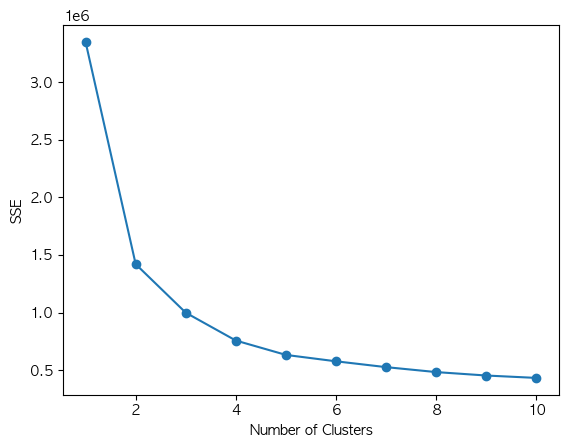

In [10]:
# Íµ∞ÏßëÌôî Í∞úÏàò Ï∞æÍ∏∞ Î∞è Íµ∞Ïßë ÌèâÍ∞ÄÌïòÍ∏∞! (Î™©Ï†ÅÎ≥ÄÏàòÎèÑ Ìè¨Ìï®Ìï¥ÏÑú ÏßÑÌñâ - Ï†ÑÎûµ Í∏∞ÌöçÏùÑ ÏúÑÌï¥ÏÑú!)

# 1. Elbow MethodÎ°ú KÎ•º Íµ¨ÌïòÍ∏∞!

# SSE Í≥ÑÏÇ∞ÏùÑ ÏúÑÌïú Î¶¨Ïä§Ìä∏
sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train)
    sse.append(kmeans.inertia_)

# ÏóòÎ≥¥Ïö∞ Î©îÏÑúÎìú Í∑∏ÎûòÌîÑ
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

sil_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train)
    sil_score = silhouette_score(train, kmeans.labels_)
    sil_scores.append(sil_score)

# Ïã§Î£®Ïó£ Î∂ÑÏÑù Í∑∏ÎûòÌîÑ
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# ÎàÑÏ†ÅÎêú ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ Í∑∏ÎûòÌîÑÎ•º Î≥¥Í≥† PCA Ï£ºÏÑ±Î∂Ñ Ïàò Í≤∞Ï†ïÌïòÍ∏∞!

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# train_dfÎ•º ÌäπÏ†ï Ïó¥Î°úÎßå Íµ¨ÏÑ±Îêú NumPy Î∞∞Ïó¥Î°ú Î≥ÄÌôò
# ÌïÑÏöîÏóê Îî∞Îùº ÌäπÏ†ï Ïó¥Îßå ÏÑ†ÌÉùÌïòÏó¨ XÏóê Ìï†Îãπ
X = train_df.values

# Îç∞Ïù¥ÌÑ∞Î•º ÌëúÏ§ÄÌôî (Standardization)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# PCA Î™®Îç∏ ÏÉùÏÑ±
pca = PCA()
X_pca = pca.fit_transform(X_standardized)

# ÎàÑÏ†ÅÎêú ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞ ÏãúÍ∞ÅÌôî
explained_variance_ratio_cumsum = pca.explained_variance_ratio_.cumsum()

plt.plot(range(1, len(explained_variance_ratio_cumsum) + 1), explained_variance_ratio_cumsum, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()

## <span style="color:orange">Ï∞®ÏõêÏ∂ïÏÜå Î∞è Íµ∞ÏßëÌôî Ïã§Ïãú</span> <span style="color:red"> + "Î≥ÄÏàòÎßàÎã§ Íµ∞ÏßëÎ≥Ñ Ï∞®Ïù¥, ÌäπÏßï ÌååÏïÖÌïòÍ∏∞"</span>

In [9]:
# Íµ∞ÏßëÌôî Î∞è Ï∞®ÏõêÏ∂ïÏÜåÎ•º ÏúÑÌï¥ ÌòπÏãú Î™®Î•¥Îãà Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨Ìï¥ÎÜìÍ∏∞!
train = train_df.copy()

In [10]:
# Ï∞®ÏõêÏ∂ïÏÜå
##### 1. Îç∞Ïù¥ÌÑ∞ ÌòïÌÉúÍ∞Ä Ïñ¥ÎñªÍ≤å ÎêòÏñ¥ÏûàÏùÑÏßÄ ÏãúÍ∞ÅÏ†ÅÏúºÎ°ú ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ Ï∞®ÏõêÏ∂ïÏÜå Ï†ÅÏö© (2, 3Ï∞®Ïõê)
##### 2. PCAÎ•º Í∞ÄÏû• Ïûò ÏïåÍ≥† ÏûàÍ∏∞Ïóê ÏÑ§Î™ÖÌïòÍ∏∞ÎèÑ Ìé∏Ìï¥ÏÑú PCA ÏÇ¨Ïö©!
##### 3. ÏµúÎåÄÌïú Ï†ïÎ≥¥Ïùò ÏÜêÏã§ÏùÑ Ï§ÑÏù¥Í∏∞ ÏúÑÌï¥ÏÑú Ï†ïÎ≥¥Í∞Ä ÏñºÎßàÎÇò Ï§ÑÏóàÎäîÏßÄÎèÑ ÌôïÏù∏ÌïòÍ∏∞!

pca = PCA(n_components=2)
pca_result = pca.fit_transform(train)

# PCA Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
train_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
train_final = pd.concat([train, train_pca], axis=1)

# PCA Ï£ºÏÑ±Î∂ÑÎ≥Ñ ÏÑ§Î™ÖÎêú Î∂ÑÏÇ∞Ïùò ÎπÑÏú® Ï∂úÎ†•
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print("PC1:", explained_variance_ratio[0])
print("PC2:", explained_variance_ratio[1])

Explained Variance Ratio:
PC1: 0.7813602751145823
PC2: 0.1461351958296993


In [11]:
# 2Ï∞®Ïõê ÏÇ∞Ï†êÎèÑ ÏãúÍ∞ÅÌôî
import plotly.express as px

fig = px.scatter(train_final, x='PC1', y='PC2')
fig.show()

In [12]:
# Ï∞®ÏõêÏ∂ïÏÜåÎ•º Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞Î°ú Íµ∞ÏßëÌôî ÌõÑ ÏãúÍ∞ÅÌôî!

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# K-means Íµ∞ÏßëÌôîÎ•º ÏúÑÌï¥ PCA Ï†ÅÏö©
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train)

# PCA Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
train_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
train_final = pd.concat([train, train_pca], axis=1)

# K-means Íµ∞ÏßëÌôî
kmeans = KMeans(n_clusters=4, random_state=42).fit(train_pca[['PC1', 'PC2']])

# Íµ∞Ïßë Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
train_final['cluster'] = kmeans.labels_

# K-means Íµ∞Ïßë Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig_cluster = px.scatter(train_final, x='PC1', y='PC2', color='cluster', title='K-means Clustering')
fig_cluster.show()

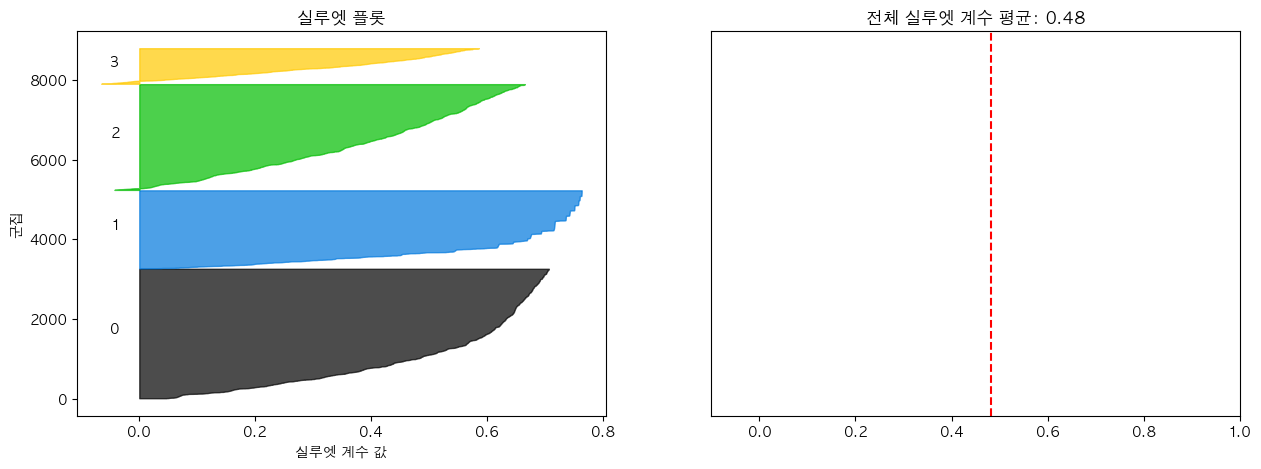

In [16]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# K-means Íµ∞ÏßëÌôî Í≤∞Í≥ºÏóê ÎåÄÌïú Ïã§Î£®Ïó£ Í≥ÑÏàò Í≥ÑÏÇ∞
silhouette_values = silhouette_samples(train_pca[['PC1', 'PC2']], kmeans.labels_)

# Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ïã§Î£®Ïó£ Í≥ÑÏàò Ï∂îÍ∞Ä
train_final['silhouette'] = silhouette_values

# ÏãúÍ∞ÅÌôî
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Ïã§Î£®Ïó£ ÌîåÎ°Ø
y_lower = 10
for i in range(4):  # Íµ∞ÏßëÏùò ÏàòÏóê Îî∞Îùº Ï°∞Ï†à
    ith_cluster_silhouette_values = silhouette_values[train_final['cluster'] == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / 4)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Ïã§Î£®Ïó£ ÌîåÎ°Ø")
ax1.set_xlabel("Ïã§Î£®Ïó£ Í≥ÑÏàò Í∞í")
ax1.set_ylabel("Íµ∞Ïßë")

# Ï†ÑÏ≤¥ Ïã§Î£®Ïó£ Í≥ÑÏàò ÌèâÍ∑† ÌîåÎ°Ø
silhouette_avg = silhouette_score(train_pca[['PC1', 'PC2']], kmeans.labels_)
ax2.axvline(x=silhouette_avg, color="red", linestyle="--")
ax2.set_yticks([])  # y Ï∂ï Î†àÏù¥Î∏î Ï†úÍ±∞
ax2.set_xlim([-0.1, 1])
ax2.set_title("Ï†ÑÏ≤¥ Ïã§Î£®Ïó£ Í≥ÑÏàò ÌèâÍ∑†: {:.2f}".format(silhouette_avg))

plt.show()

In [17]:
# Ïã§Î£®Ïó£ Í≥ÑÏàòÍ∞Ä 0.4 (Ïä§ÏΩîÏñ¥) Ïù¥ÏÉÅÏù¥Î©¥ ÎÜíÏùÄÍ±∞ÏûÑ „Öá„Öá!

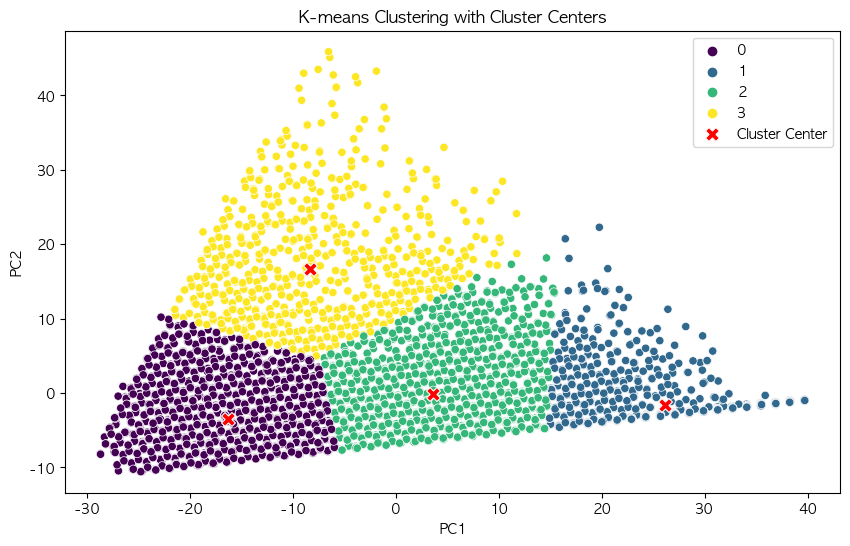

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Íµ∞ÏßëÎ≥Ñ Ï§ëÏã¨ ÏãúÍ∞ÅÌôî
cluster_centers = kmeans.cluster_centers_
center_df = pd.DataFrame(data=cluster_centers, columns=['PC1', 'PC2'])

# Íµ∞ÏßëÌôî Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig, ax = plt.subplots(figsize=(10, 6))

# Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Ïùò 2Ï∞®Ïõê ÏÇ∞Ï†êÎèÑ
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=train_final, palette='viridis', ax=ax)

# Íµ∞Ïßë Ï§ëÏã¨ ÏãúÍ∞ÅÌôî
sns.scatterplot(x='PC1', y='PC2', data=center_df, color='red', marker='X', s=100, ax=ax, label='Cluster Center')

plt.title('K-means Clustering with Cluster Centers')
plt.legend()
plt.show()

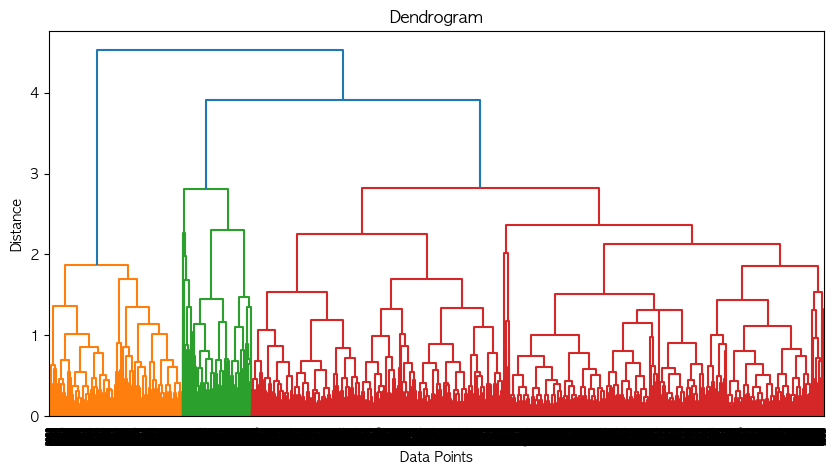

In [16]:
# Í≥ÑÏ∏µÏ†Å Íµ∞ÏßëÌôî (Îç¥ÎìúÎ°úÍ∑∏Îû®ÏúºÎ°ú ÏãúÍ∞ÅÌôî)
# üî• Ïù¥Í±∞ Ïó¨Í∏∞ÏÑú ÎÅùÎÇ¥ÎäîÍ≤å ÏïÑÎãàÍ≥† ÏµúÏ†ÅÏùò Ìä∏Î¶¨ Ïàò ÎÑ£Ïñ¥ÏÑú Íµ∞Ïßë Í≤∞Í≥º Î¥êÏïºÌï®!

import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'train_df' is your DataFrame
train = train_df.copy()

# Standardize the data before PCA
scaler = StandardScaler()
train_standardized = scaler.fit_transform(train)

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_standardized)

# Create a DataFrame with PCA results
train_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Hierarchical clustering
Z = hierarchy.linkage(train_pca, method='average', metric='euclidean')

# Dendrogram visualization
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')
plt.show()


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

train = train_df.copy()

# K-means ÎåÄÏã† GMM Íµ∞ÏßëÌôîÎ•º ÏúÑÌï¥ PCA Ï†ÅÏö©
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train)

# PCA Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
train_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
train_final = pd.concat([train, train_pca], axis=1)

# GMM Íµ∞ÏßëÌôî
gmm = GaussianMixture(n_components=4, random_state=42).fit(train_pca[['PC1', 'PC2']])

# Íµ∞Ïßë Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
train_final['cluster'] = gmm.predict(train_pca[['PC1', 'PC2']])

# GMM Íµ∞Ïßë Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig_cluster_gmm = px.scatter(train_final, x='PC1', y='PC2', color='cluster', title='GMM Clustering')
fig_cluster_gmm.show()

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨
train = train_df.copy()

# PCA Ï†ÅÏö©
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train)

# PCA Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
train_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
train_final = pd.concat([train, train_pca], axis=1)

# DBSCAN Íµ∞ÏßëÌôî
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(train_final[['PC1', 'PC2']])

# Íµ∞Ïßë Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
train_final['cluster'] = dbscan.labels_

# DBSCAN Íµ∞Ïßë Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig_cluster_dbscan = px.scatter(train_final, x='PC1', y='PC2', color='cluster', title='DBSCAN Clustering')
fig_cluster_dbscan.show()

In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler

# Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨
train = train_df.copy()

# PCA Ï†ÅÏö©
pca = PCA(n_components=2)
pca_result = pca.fit_transform(train)

# PCA Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
train_pca = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
train_final = pd.concat([train, train_pca], axis=1)

# StandardScalerÎ•º ÏÇ¨Ïö©ÌïòÏó¨ PCA Í≤∞Í≥ºÎ•º ÌëúÏ§ÄÌôî
scaler = StandardScaler()
scaled_pca_result = scaler.fit_transform(train_pca[['PC1', 'PC2']])
train_final[['PC1', 'PC2']] = scaled_pca_result

# MeanShift Íµ∞ÏßëÌôî
meanshift = MeanShift(bandwidth=0.5).fit(train_final[['PC1', 'PC2']])

# Íµ∞Ïßë Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
train_final['cluster'] = meanshift.labels_

# MeanShift Íµ∞Ïßë Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig_cluster_meanshift = px.scatter(train_final, x='PC1', y='PC2', color='cluster', title='Meanshift Clustering')
fig_cluster_meanshift.show()

In [ ]:
# [ÏãúÍ∞ÅÌôî] PCA(2) + K-means(4) ÌñàÎã§Îäî Í∞ÄÏ†ï ÌïòÏóê ÏßÑÌñâ

import matplotlib.pyplot as plt
import seaborn as sns

# ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞Î°ú Î≥ÄÏàòÎßàÎã§ ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥Ñ ÌäπÏßï ÌååÏïÖÌïòÍ∏∞
train_fin = train_final.copy()

# pc1, pc2, clusterÎ•º Ï†úÏô∏Ìïú 20Í∞úÏùò Î≥ÄÏàò Î¶¨Ïä§Ìä∏
variables_to_plot = train_fin.columns.difference(['PC1', 'PC2', 'cluster'])

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨Î•º ÌûàÏä§ÌÜ†Í∑∏Îû®ÏúºÎ°ú Í∑∏Î¶¨Í∏∞
for variable in variables_to_plot:
    plt.figure(figsize=(12, 6))
    for cluster_label in train_fin['cluster'].unique():
        sns.histplot(train_fin[train_fin['cluster'] == cluster_label][variable], label=f'Cluster {cluster_label}', kde=True)

    plt.title(f'Distribution of {variable} by Cluster')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

## <span style="color:orange">(Ï∞®ÏõêÏ∂ïÏÜåX) Íµ∞ÏßëÌôîÎßå Ïã§Ïãú</span> <span style="color:red"> + "Î≥ÄÏàòÎßàÎã§ Íµ∞ÏßëÎ≥Ñ Ï∞®Ïù¥, ÌäπÏßï ÌååÏïÖÌïòÍ∏∞"</span>

In [13]:
# Íµ∞ÏßëÌôî Î∞è Ï∞®ÏõêÏ∂ïÏÜåÎ•º ÏúÑÌï¥ ÌòπÏãú Î™®Î•¥Îãà Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨Ìï¥ÎÜìÍ∏∞!
train = train_df.copy()

In [14]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Íµ¨ÏÑ± Î≥ÄÏàò ÏÉùÏÑ±!! [PCA ÏïàÌïòÍ≥†!] [ÎãπÏó∞Ìûà Î™©Ï†ÅÎ≥ÄÏàò Ìè¨Ìï® ÏßÑÌñâ!]
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42).fit(train)
train['cluster'] = kmeans.predict(train)

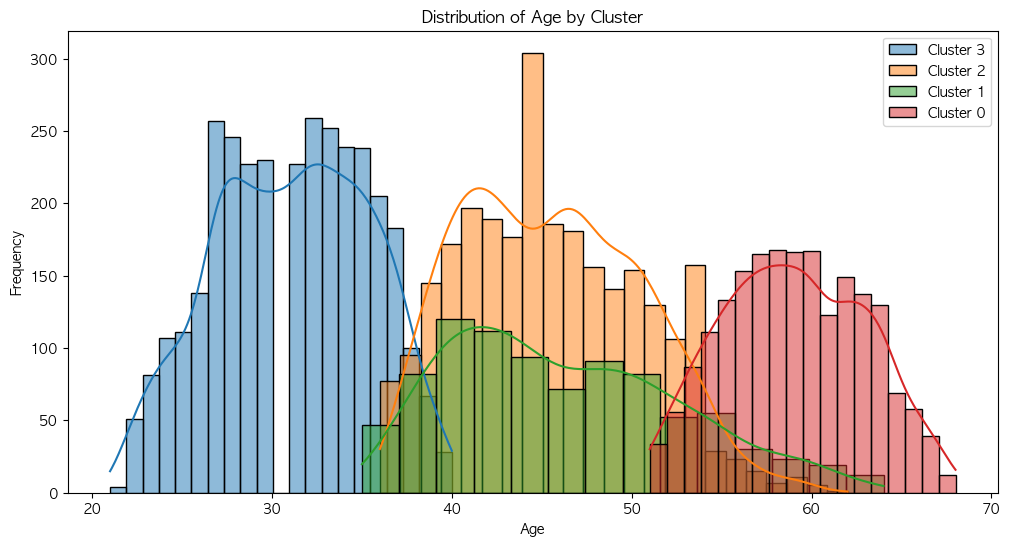

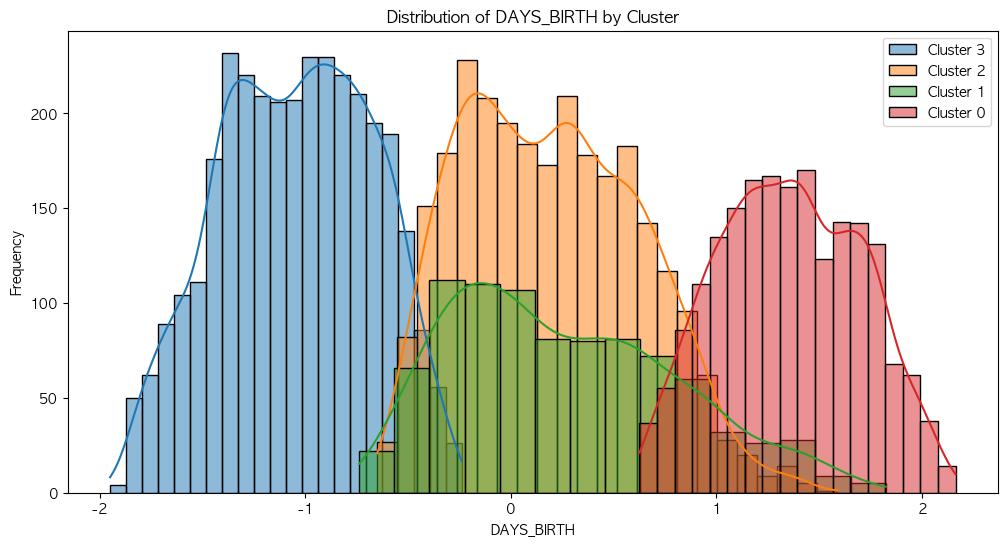

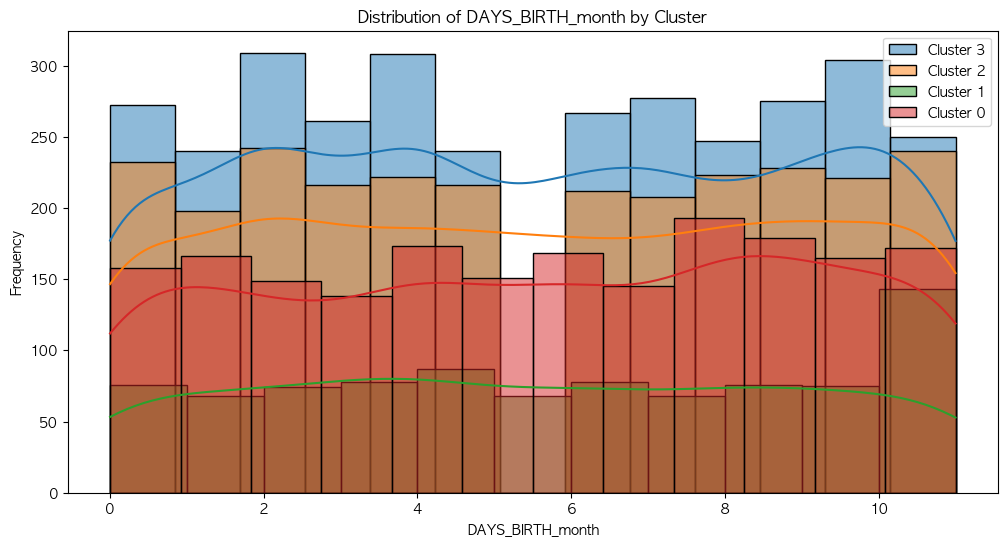

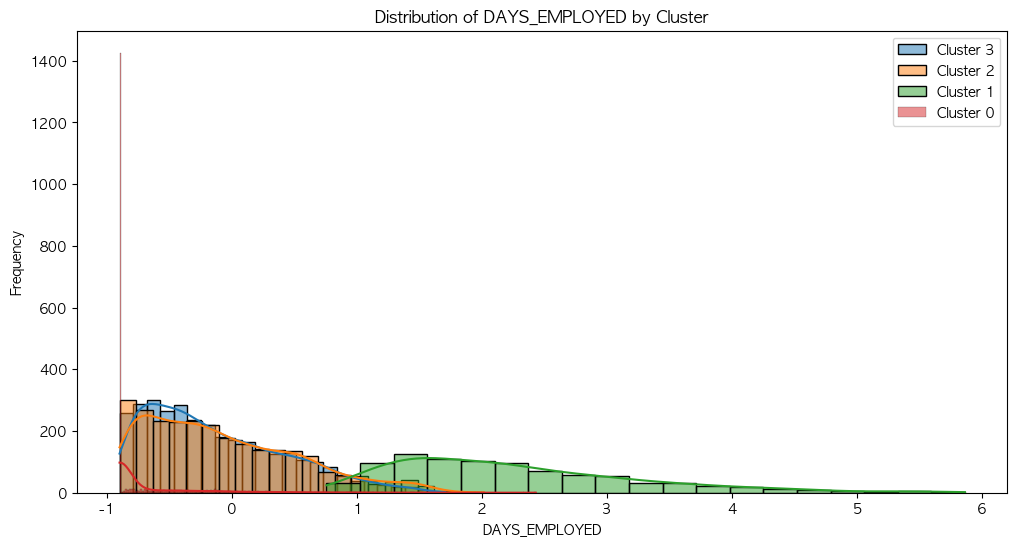

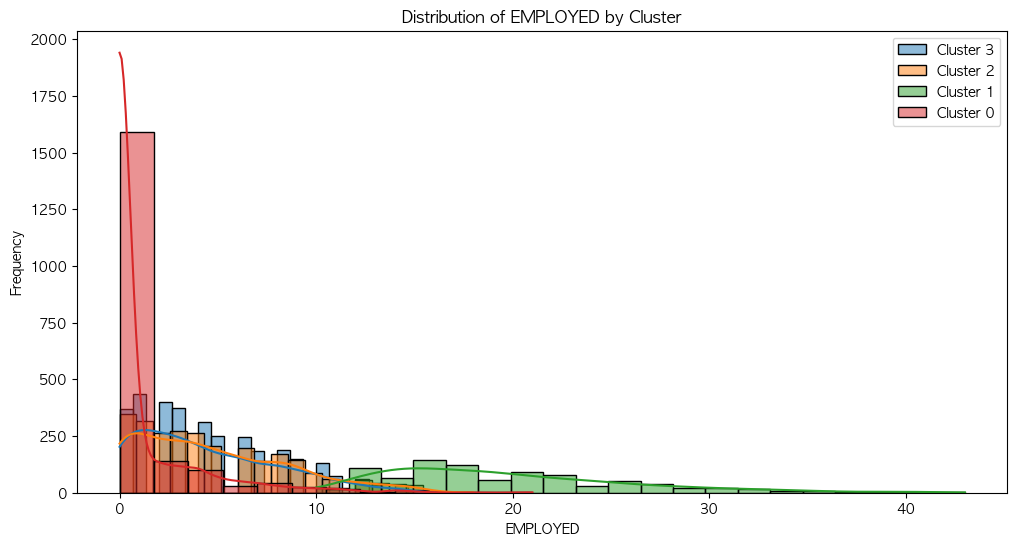

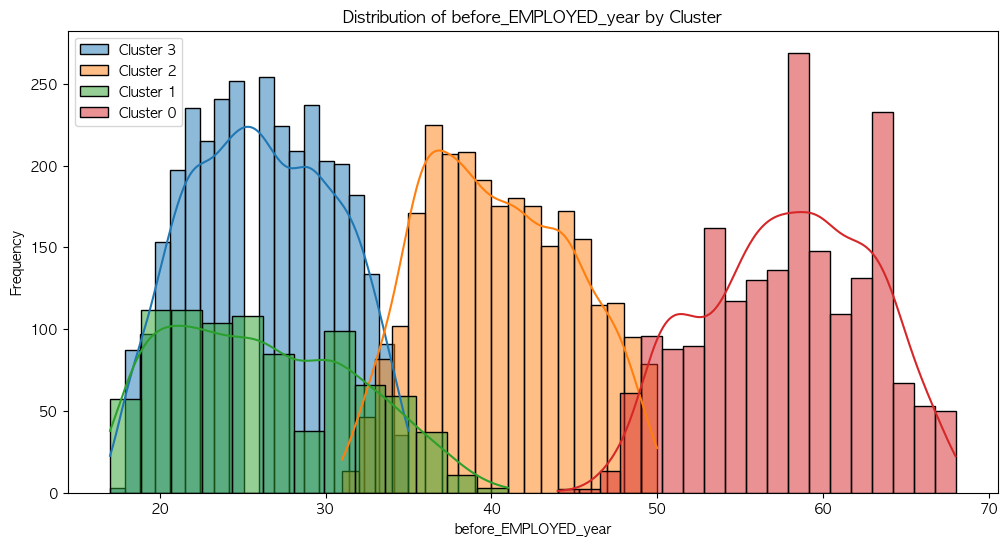

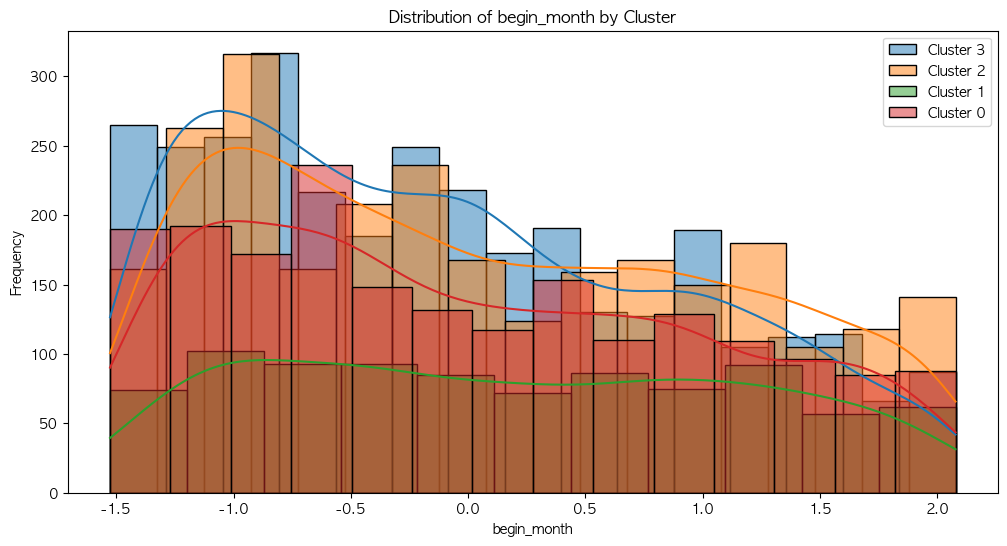

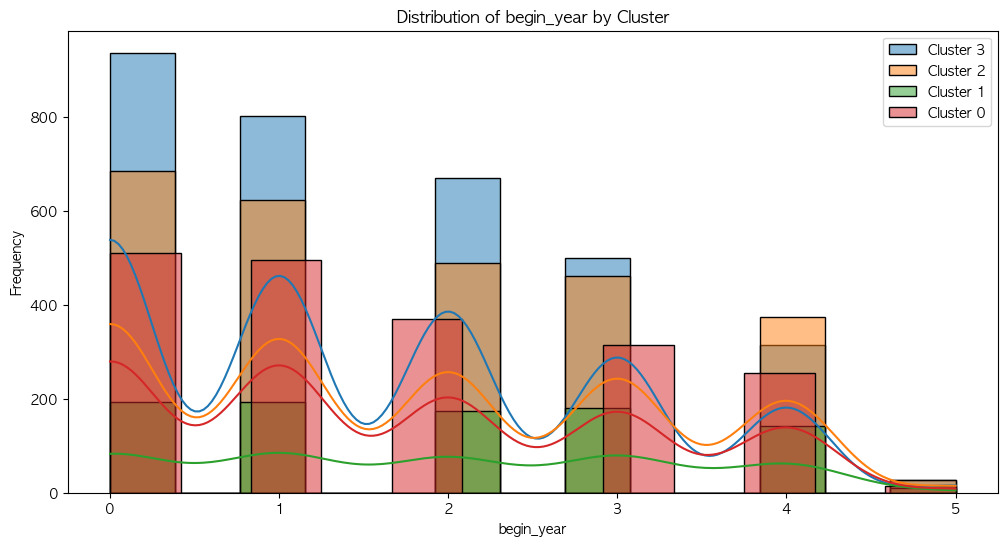

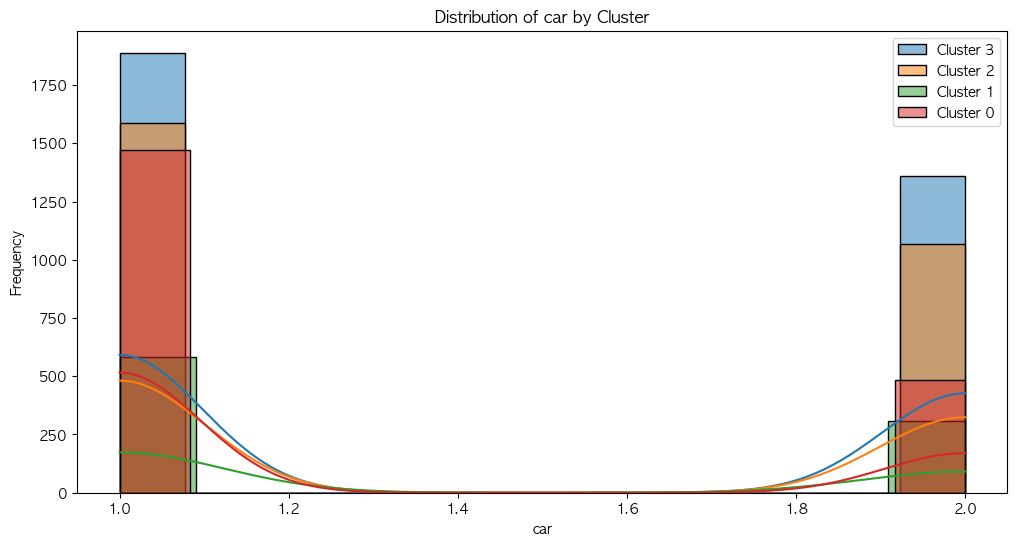

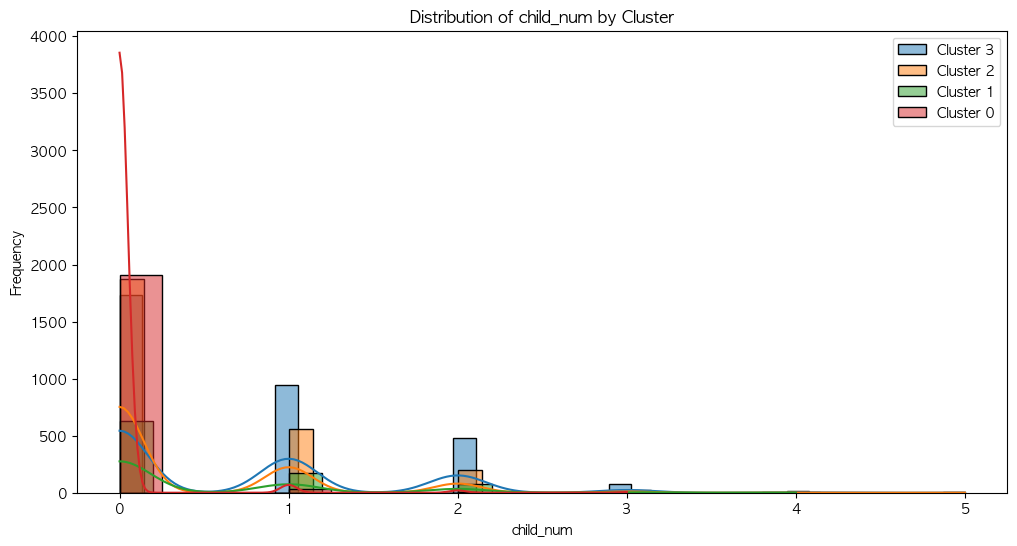

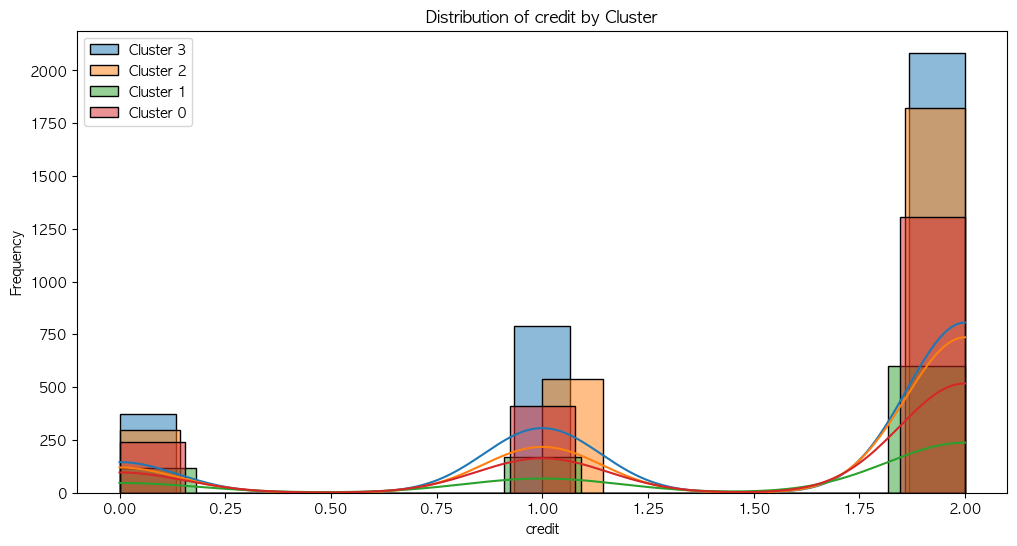

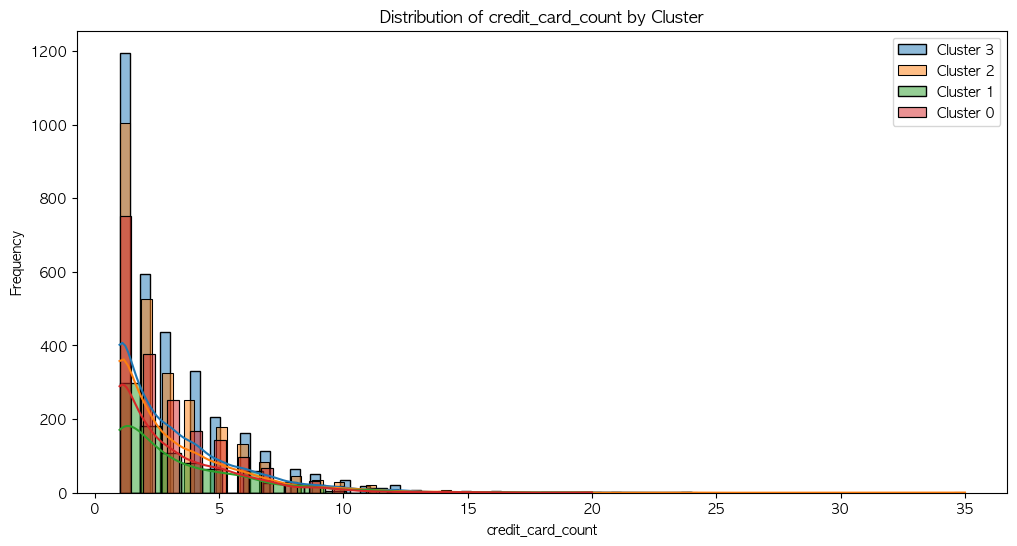

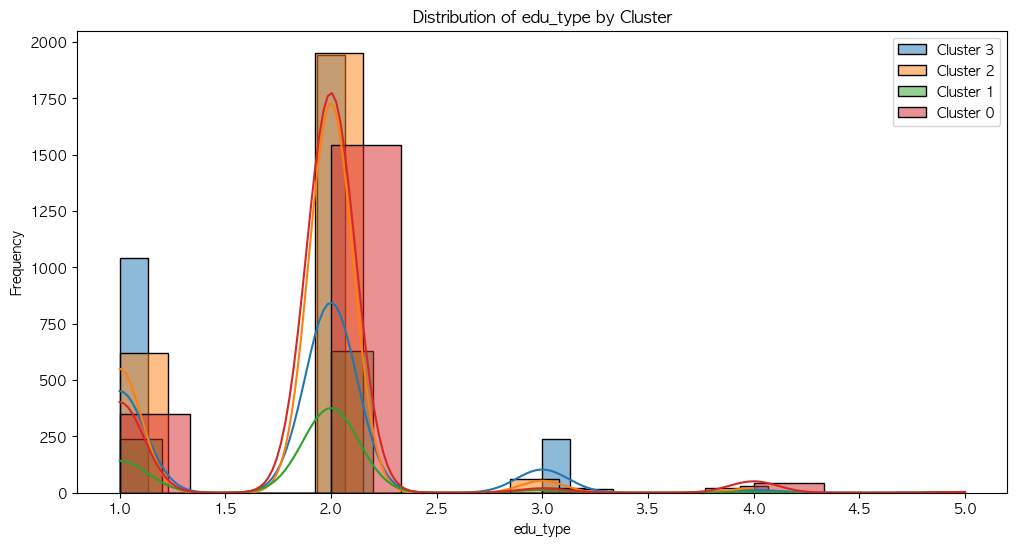

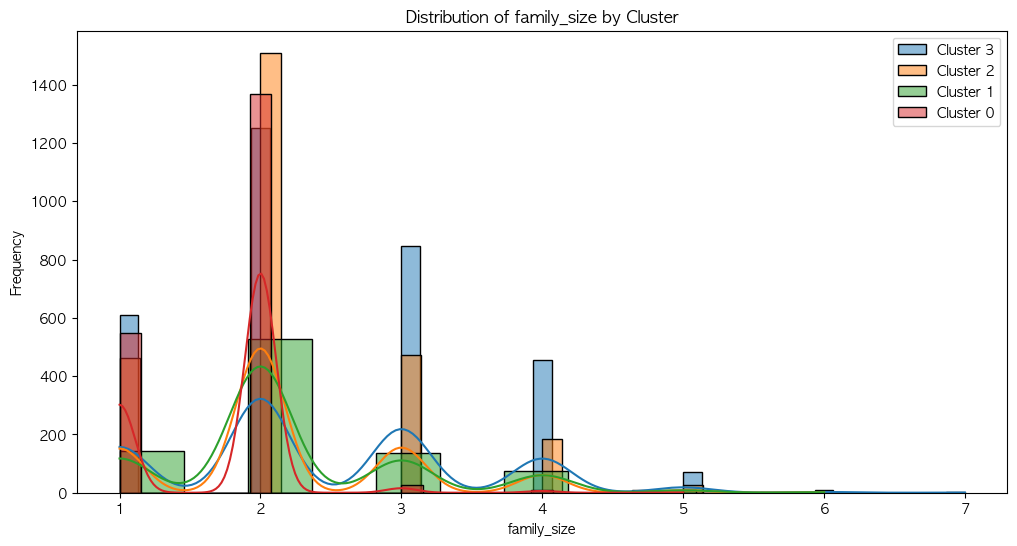

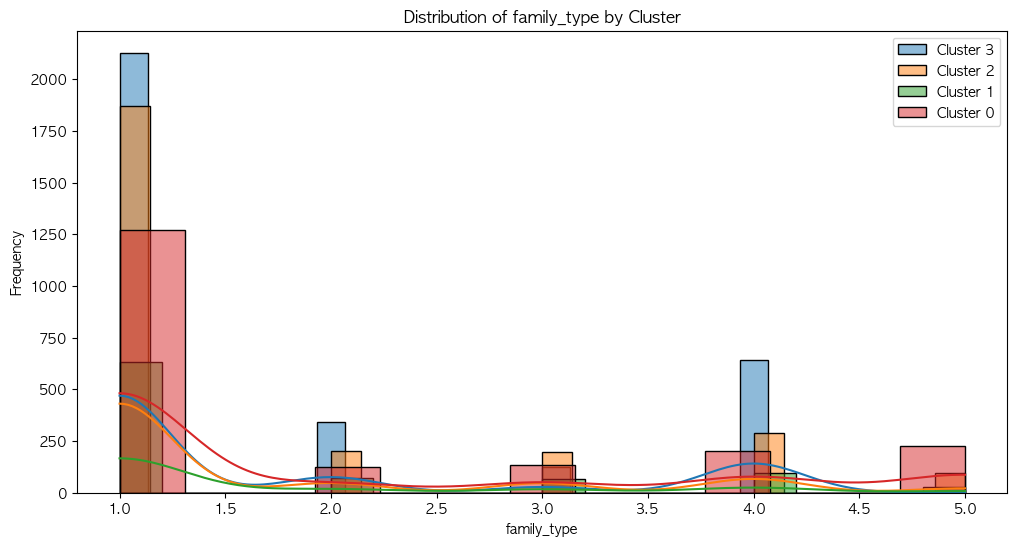

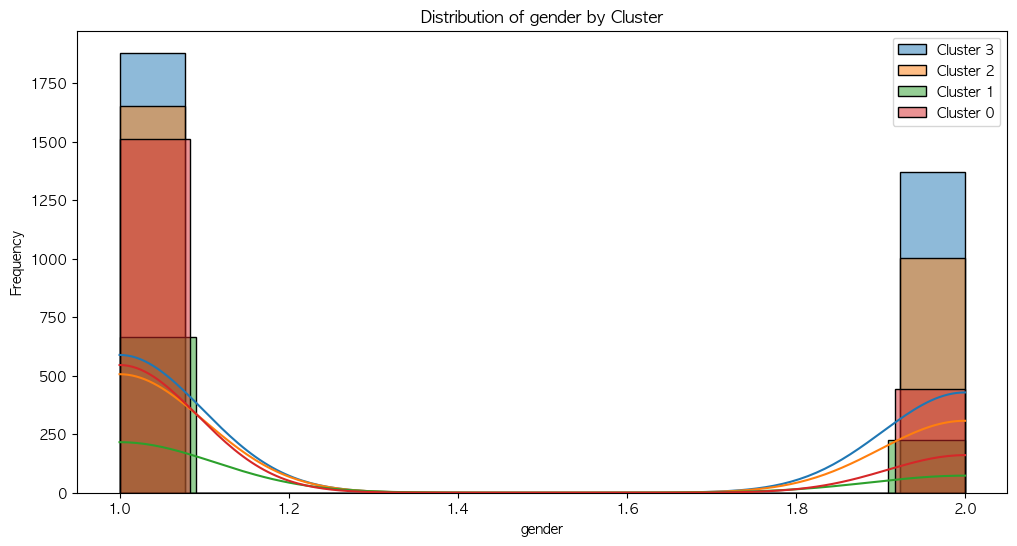

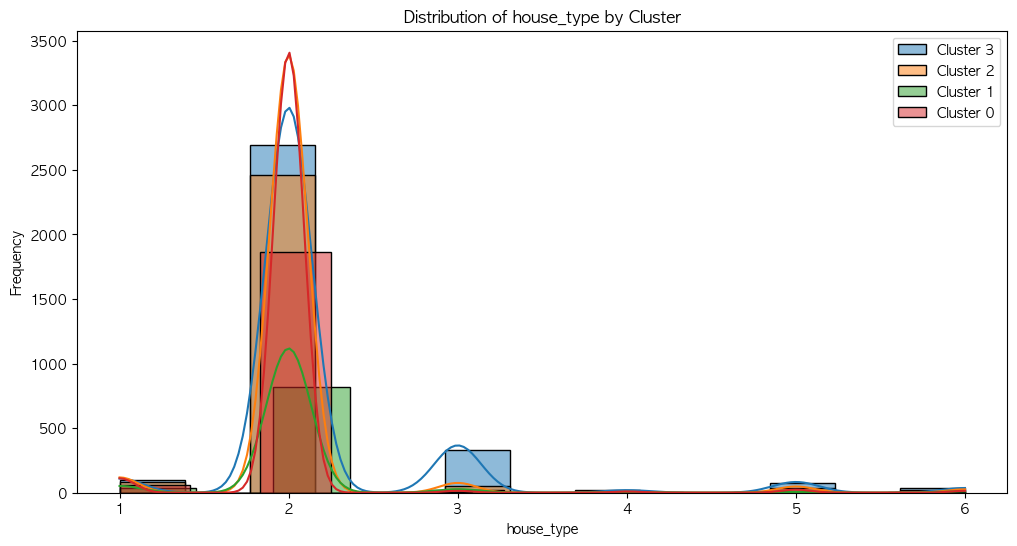

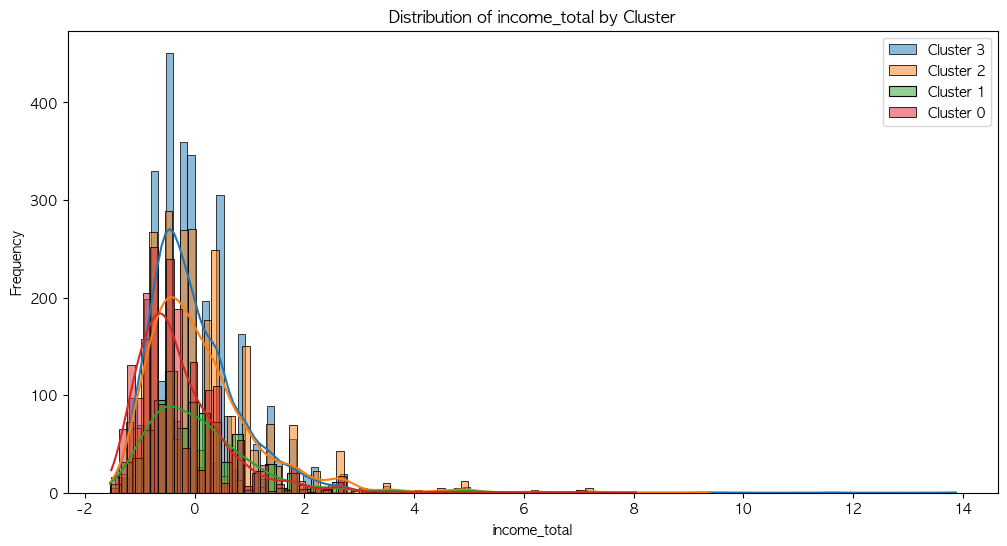

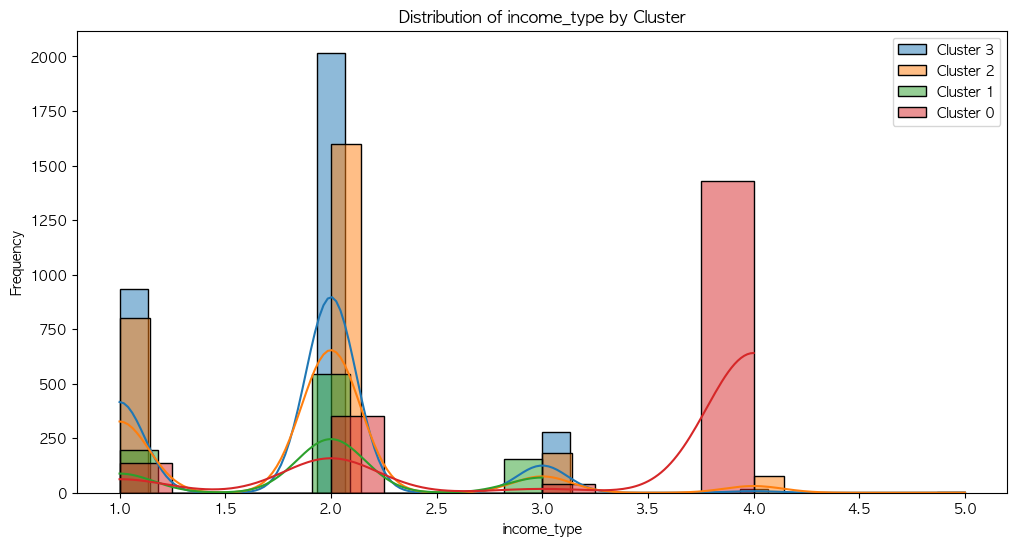

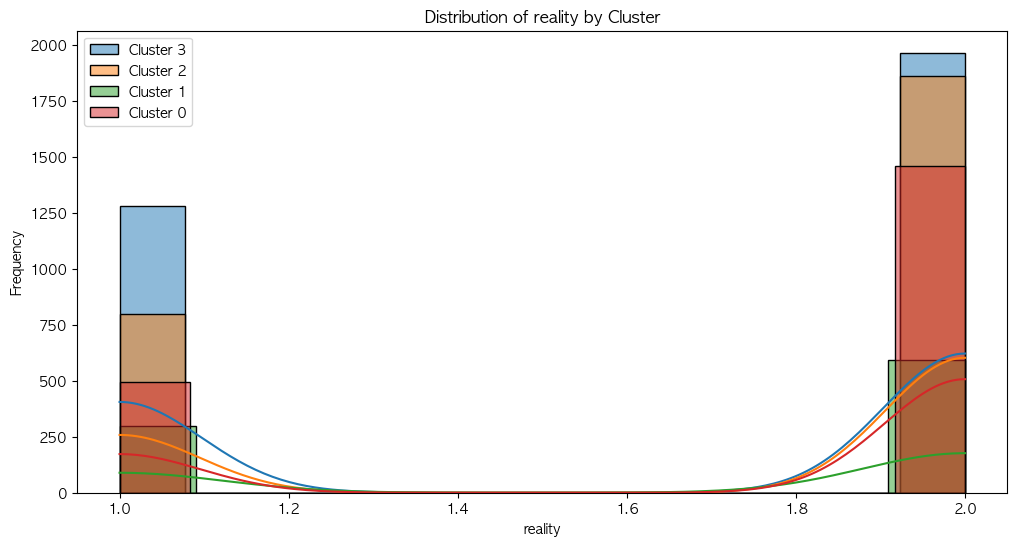

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 'cluster' Î≥ÄÏàòÎ•º Ï†úÏô∏Ìïú ÎÇòÎ®∏ÏßÄ Î≥ÄÏàòÎì§Ïùò Î¶¨Ïä§Ìä∏
variable_list = train.columns.difference(['cluster'])

# Î≥ÄÏàòÎì§Ïóê ÎåÄÌïú ÌûàÏä§ÌÜ†Í∑∏Îû® Í∑∏Î¶¨Í∏∞
for variable in variable_list:
    plt.figure(figsize=(12, 6))
    for cluster_label in train['cluster'].unique():
        sns.histplot(train[train['cluster'] == cluster_label][variable], label=f'Cluster {cluster_label}', kde=True)

    plt.title(f'Distribution of {variable} by Cluster')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

## <span style="color:orange">Î≥ÄÏàòÏùò ÌäπÏßï Î≥ÑÎ°ú ÏàòÎèôÏ†ÅÏù∏ Íµ∞Ïßë(ÌÉÄÍ≤ü) ÏÑ§Ï†ïÌïòÍ∏∞</span> <span style="color:red"> + "Î≥ÄÏàòÎßàÎã§ Íµ∞ÏßëÎ≥Ñ Ï∞®Ïù¥, ÌäπÏßï ÌååÏïÖÌïòÍ∏∞"</span>

In [39]:
# Íµ∞ÏßëÌôî Î∞è Ï∞®ÏõêÏ∂ïÏÜåÎ•º ÏúÑÌï¥ ÌòπÏãú Î™®Î•¥Îãà Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨Ìï¥ÎÜìÍ∏∞!
train = train_df.copy()

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8756 entries, 0 to 8755
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                8756 non-null   int64  
 1   car                   8756 non-null   int64  
 2   reality               8756 non-null   int64  
 3   child_num             8756 non-null   int64  
 4   income_total          8756 non-null   float64
 5   income_type           8756 non-null   int64  
 6   edu_type              8756 non-null   int64  
 7   family_type           8756 non-null   int64  
 8   house_type            8756 non-null   int64  
 9   DAYS_BIRTH            8756 non-null   float64
 10  DAYS_EMPLOYED         8756 non-null   float64
 11  family_size           8756 non-null   float64
 12  begin_month           8756 non-null   float64
 13  credit                8756 non-null   float64
 14  credit_card_count     8756 non-null   int64  
 15  before_EMPLOYED_year 

In [29]:
# gender (ÏÑ±Î≥Ñ)
# car (Ï∞® ÏÜåÏú† Ïó¨Î∂Ä)
# reality (Î∂ÄÎèôÏÇ∞ ÏÜåÏú† Ïó¨Î∂Ä)
# child_num (ÏûêÎÖÄ Ïàò)
# income_total (Ï¥ù ÏÜåÎìù)
# income_type (ÏÜåÎìù Ïú†Ìòï)
# edu_type (ÍµêÏú° ÏàòÏ§Ä)
# family_type (Í∞ÄÏ°± Ïú†Ìòï)
# house_type (Ï£ºÌÉù Ïú†Ìòï)
# DAYS_BIRTH (ÏÉùÏùºÎ°úÎ∂ÄÌÑ∞Ïùò ÏùºÏàò)
# DAYS_EMPLOYED (Í≥†Ïö©ÏùºÎ°úÎ∂ÄÌÑ∞Ïùò ÏùºÏàò)
# family_size (Í∞ÄÏ°± Í∑úÎ™®)
# begin_month (Ïã†Ïö©Ïπ¥Îìú Î∞úÍ∏â Ïõî)
# credit (Ïã†Ïö© Îì±Í∏â)
# credit_card_count (Ïã†Ïö©Ïπ¥Îìú Î≥¥Ïú† Í∞úÏàò)
# before_EMPLOYED_year (Í≥†Ïö© Ï†Ñ Í≤ΩÎ†• Ïó∞Ïàò)
# Age (ÎÇòÏù¥)
# DAYS_BIRTH_month (ÌÉúÏñ¥ÎÇú Ïõî)
# EMPLOYED (Í∑ºÏÜç Ïó∞Ïàò)
# begin_year (Ïã†Ïö©Ïπ¥Îìú Î∞úÍ∏â Ïó∞ÎèÑ)

In [40]:
for variable in train.columns:
    counts = train[variable].value_counts()
    print(f"\n{variable}:\n{counts}")


gender:
1    5713
2    3043
Name: gender, dtype: int64

car:
1    5534
2    3222
Name: car, dtype: int64

reality:
2    5880
1    2876
Name: reality, dtype: int64

child_num:
0    6144
1    1708
2     769
3     116
4      16
5       3
Name: child_num, dtype: int64

income_total:
135000.0    1022
112500.0     768
180000.0     761
157500.0     751
225000.0     673
            ... 
418500.0       1
30150.0        1
231750.0       1
208350.0       1
191700.0       1
Name: income_total, Length: 249, dtype: int64

income_type:
2    4512
1    2066
4    1519
3     656
5       3
Name: income_type, dtype: int64

edu_type:
2    6067
1    2249
3     334
4     100
5       6
Name: edu_type, dtype: int64

family_type:
1    5904
4    1227
2     739
3     521
5     365
Name: family_type, dtype: int64

house_type:
2    7831
3     414
1     284
5     127
6      68
4      32
Name: house_type, dtype: int64

DAYS_BIRTH:
13788    5
20836    5
10425    5
14887    4
14775    4
        ..
23478    1
13271    1

In [41]:
train.describe()

gender          car     reality    child_num  income_total  \
count  8756.000000  8756.000000  8756.00000  8756.000000  8.756000e+03   
mean      1.347533     1.367976     1.67154     0.419484  1.818929e+05   
std       0.476214     0.482282     0.46968     0.726290  1.004623e+05   
min       1.000000     1.000000     1.00000     0.000000  2.700000e+04   
25%       1.000000     1.000000     1.00000     0.000000  1.125000e+05   
50%       1.000000     1.000000     2.00000     0.000000  1.575000e+05   
75%       2.000000     2.000000     2.00000     1.000000  2.250000e+05   
max       2.000000     2.000000     2.00000     5.000000  1.575000e+06   

       income_type     edu_type  family_type   house_type    DAYS_BIRTH  \
count  8756.000000  8756.000000  8756.000000  8756.000000   8756.000000   
mean      2.186958     1.806190     1.790544     2.096734  15975.970534   
std       0.986427     0.556166     1.275068     0.582935   4242.078014   
min       1.000000     1.000000     1.000000     1.000000   7705.000000   
25%       2.000000     1.000000     1.000000     2.000000  12407.500000   
50%       2.000000     2.000000     1.000000     2.000000  15607.000000   
75%       2.000000     2.000000     2.000000     2.000000  19516.250000   
max       5.000000     5.000000     5.000000     6.000000  25152.000000   

       DAYS_EMPLOYED  family_size  begin_month       credit  \
count    8756.000000  8756.000000  8756.000000  8756.000000   
mean     2083.921654     2.178735    25.408177     1.546254   
std      2324.340293     0.903150    16.646989     0.695278   
min         0.000000     1.000000     0.000000     0.000000   
25%       348.000000     2.000000    11.000000     1.000000   
50%      1379.000000     2.000000    23.000000     2.000000   
75%      3013.750000     3.000000    39.000000     2.000000   
max     15713.000000     7.000000    60.000000     2.000000   

       credit_card_count  before_EMPLOYED_year          Age  DAYS_BIRTH_month  \
count        8756.000000           8756.000000  8756.000000       8756.000000   
mean            3.020900             37.554020    43.265875          5.537003   
std             2.560143             13.319856    11.625476          3.462568   
min             1.000000             17.000000    21.000000          0.000000   
25%             1.000000             26.000000    33.000000          3.000000   
50%             2.000000             35.000000    42.000000          6.000000   
75%             4.000000             47.000000    53.000000          9.000000   
max            35.000000             68.000000    68.000000         11.000000   

          EMPLOYED   begin_year  
count  8756.000000  8756.000000  
mean      5.297168     1.668913  
std       6.299137     1.391299  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       3.000000     1.000000  
75%       8.000000     3.000000  
max      43.000000     5.000000

In [1]:
# Ïù¥Î†áÍ≤å Î¥êÎèÑ ÎêòÍ≥†
# "ÏµúÏ¢ÖÎ≥∏"Ï≤òÎüº ÌïúÍ∏ÄÏùÑ Î≥¥Î†§Î©¥ Ï§ëÍ∞ÑÏóê Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Ï†ÄÏû• ÌõÑ concatÌï¥Ï§òÎèÑ Îê®.
# Î¨ºÎ°† Ïù∏ÏΩîÎî©Ìïú Î∞©ÏãùÏùÑ Ïï†Ï¥àÏóê ÏïåÍ≥† ÏûàÏúºÎ©¥ Îã§Ïãú ÏûÖÌûàÍ±∞ÎÇò ÎÇòÎßå ÏïåÍ≥† ÏßÑÌñâÌïòÍ±∞ÎÇò Ìï¥ÎèÑ Îê®.